In [ ]:
Q 1)What is a Decision Tree, and how does it work?
>> A decision tree is a popular supervised machine learning algorithm used for classification and regression tasks, 
    structured like a flowchart to map decisions and their potential outcomes.

In [ ]:
Q 2)What are impurity measures in Decision Trees?
>> Gini Impurity, Entropy, and Misclassification Error

In [ ]:
Q 3)What is the mathematical formula for Gini Impurity?
>> Gini = 1 − Σ(pᵢ²)

In [ ]:
Q 4)What is the mathematical formula for Entropy?
>> ΔS = Q_rev

In [ ]:
Q 5)What is Information Gain, and how is it used in Decision Trees?
>>  a metric measuring the reduction in entropy (uncertainty or impurity) within a dataset after splitting it based on a specific feature

In [ ]:
Q 6)What is the difference between Gini Impurity and Entropy?
>> Gini Impurity
    Probability of incorrectly classifying a randomly chosen element if it were randomly labeled 
     according to the class distribution in the node.
   Entropy
   Measures the uncertainty or randomness in the data; high entropy means high disorder (mixed classes).

In [ ]:
Q 7)What is the mathematical explanation behind Decision Trees?
>> recursive binary splitting process, known as a greedy top-down approach

In [ ]:
Q 8)What is Pre-Pruning in Decision Trees?
>> is a technique that halts the tree's growth during its construction to prevent it from becoming too complex and overfitting the training data

In [ ]:
Q 9)What is Post-Pruning in Decision Trees?
>>a technique used after a full tree is grown to simplify it by removing branches (nodes/subtrees) that add little value thus combating overfitting
  and improving generalization to new data by reducing complexity, often using a validation set or cost-complexity (ccp_alpha). 

In [ ]:
Q 10)What is the difference between Pre-Pruning and Post-Pruning?
>> pre-pruning > 
    1. During construction (forward)
    2. Efficiency Faster (less computational cost)
   post-pruning >
    1. After construction (backward)
    2. Slower (requires full training)

In [ ]:
Q 11)What is a Decision Tree Regressor?
>>  is a machine learning model that uses a tree-like structure to predict continuous numerical values, such as house prices or temperature

In [ ]:
Q 12)What are the advantages and disadvantages of Decision Trees?
>> ease of interpretation (white-box models), minimal data preparation, handling both numerical/categorical data, and capturing non-linear patterns,

In [ ]:
Q 13)How does a Decision Tree handle missing values?
>> by using surrogate splits, treating them as a separate category, or distributing instances proportionally based on data distribution

In [ ]:
Q 14)How does a Decision Tree handle categorical features?
>> Decision trees handle categorical features primarily by finding binary splits that partition categories to minimize impurity (Gini or Entropy),
    often evaluating all \(2^{K-1}-1\) combinations for \(K\) classes.

In [ ]:
Q 15)What are some real-world applications of Decision Trees?
>> loan approval risk assessment, medical diagnosis based on patient symptoms, customer churn prediction, fraud detection in banking,
    and customer segmentation. 

# practical

In [ ]:
Q 1) Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 1.00


In [ ]:
Q 2) Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the 
feature importances

In [2]:

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_classifier = DecisionTreeClassifier(criterion='gini', random_state=42)

dt_classifier.fit(X_train, y_train)

feature_importances_df = pd.Series(dt_classifier.feature_importances_, index=feature_names)

feature_importances_df = feature_importances_df.sort_values(ascending=False)

print(feature_importances_df)

accuracy = dt_classifier.score(X_test, y_test)
print(f"\nModel Accuracy on Test Set: {accuracy:.2f}")

petal length (cm)    0.893264
petal width (cm)     0.087626
sepal width (cm)     0.019110
sepal length (cm)    0.000000
dtype: float64

Model Accuracy on Test Set: 1.00


In [ ]:
Q 3) Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the 
model accuracy

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

def train_decision_tree_with_entropy():
    """
    Trains a Decision Tree Classifier using entropy and prints the accuracy.
    """
    iris = load_iris()
    X = iris.data
    y = iris.target
    print("Data loaded: Iris dataset")
    print(f"Number of samples: {X.shape[0]}, Number of features: {X.shape[1]}")
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )
    print(f"\nTraining set size: {X_train.shape[0]} samples")
    print(f"Testing set size: {X_test.shape[0]} samples")

    clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
    print("\nTraining Decision Tree Classifier with criterion='entropy'...")
    clf.fit(X_train, y_train)
    print("Training complete.")

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("\n--- Model Evaluation ---")
    print(f"Accuracy: {accuracy:.4f}")

    return clf, accuracy

if __name__ == "__main__":
    model, accuracy = train_decision_tree_with_entropy()

Data loaded: Iris dataset
Number of samples: 150, Number of features: 4

Training set size: 105 samples
Testing set size: 45 samples

Training Decision Tree Classifier with criterion='entropy'...
Training complete.

--- Model Evaluation ---
Accuracy: 0.9778


In [ ]:
Q 4) Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean 
Squared Error (MSE)

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

def train_and_evaluate_decision_tree_regressor():
    """
    Loads the California housing dataset, trains a Decision Tree Regressor,
    and evaluates it using Mean Squared Error (MSE).
    """    
    print("Loading California housing dataset...")
    housing = fetch_california_housing(as_frame=True)
    X = housing.data
    y = housing.target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Data split: {len(X_train)} training samples, {len(X_test)} testing samples.")
    
    print("Training Decision Tree Regressor...")
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train)
    print("Training complete.")
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse) 
    
    print("\n--- Model Evaluation ---")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Average target value in test set: {np.mean(y_test):.4f}")

if __name__ == "__main__":
    train_and_evaluate_decision_tree_regressor()

Loading California housing dataset...
Data split: 16512 training samples, 4128 testing samples.
Training Decision Tree Regressor...
Training complete.

--- Model Evaluation ---
Mean Squared Error (MSE): 0.4952
Root Mean Squared Error (RMSE): 0.7037
Average target value in test set: 2.0550


In [ ]:
Q 5) Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
import graphviz
from IPython.display import display, Image
np.random.seed(42)
data = {
    'height_cm': np.random.randint(150, 200, 100),
    'weight_kg': np.random.randint(50, 100, 100),
    'is_tall': [1 if h > 175 and w < 90 else 0 for h, w in zip(np.random.randint(150, 200, 100), np.random.randint(50, 100, 100))]
}
df = pd.DataFrame(data)
feature_cols = ['height_cm', 'weight_kg']
X = df[feature_cols] 
y = df['is_tall']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
dot_data = export_graphviz(clf,
                           out_file=None,
                           feature_names=feature_cols,
                           class_names=['Not Tall', 'Tall'],
                           filled=True,
                           rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)

file_name = "decision_tree"
graph.render(file_name, view=True, format="pdf")

print(f"\nDecision tree visualization saved as '{file_name}.pdf' and opened.")

In [ ]:
Q 6) Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its 
accuracy with a fully grown tree

In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_max_depth_3 = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_max_depth_3.fit(X_train, y_train)

dt_full_grown = DecisionTreeClassifier(random_state=42)
dt_full_grown.fit(X_train, y_train)

y_pred_depth_3 = dt_max_depth_3.predict(X_test)
y_pred_full_grown = dt_full_grown.predict(X_test)

accuracy_depth_3 = accuracy_score(y_test, y_pred_depth_3)
accuracy_full_grown = accuracy_score(y_test, y_pred_full_grown)

print(f"Accuracy of Decision Tree (max_depth=3): {accuracy_depth_3:.4f}")
print(f"Accuracy of Fully Grown Decision Tree: {accuracy_full_grown:.4f}")

print(f"Actual depth of fully grown tree: {dt_full_grown.get_depth()}")

Accuracy of Decision Tree (max_depth=3): 1.0000
Accuracy of Fully Grown Decision Tree: 1.0000
Actual depth of fully grown tree: 6


In [ ]:
Q 7) Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its 
accuracy with a default tree

In [7]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

default_tree = DecisionTreeClassifier(random_state=42)
default_tree.fit(X_train, y_train)

custom_tree = DecisionTreeClassifier(min_samples_split=5, random_state=42)
custom_tree.fit(X_train, y_train)

y_pred_default = default_tree.predict(X_test)
y_pred_custom = custom_tree.predict(X_test)

accuracy_default = accuracy_score(y_test, y_pred_default)
accuracy_custom = accuracy_score(y_test, y_pred_custom)

print(f"Accuracy of the default tree: {accuracy_default:.4f}")
print(f"Accuracy of the custom tree (min_samples_split=5): {accuracy_custom:.4f}")

if accuracy_custom > accuracy_default:
    print("\nThe custom tree with min_samples_split=5 has higher accuracy.")
elif accuracy_custom < accuracy_default:
    print("\nThe default tree has higher accuracy.")
else:
    print("\nBoth trees have the same accuracy.")

Accuracy of the default tree: 1.0000
Accuracy of the custom tree (min_samples_split=5): 1.0000

Both trees have the same accuracy.


In [ ]:
Q 8) Write a Python program to apply feature scaling before training a Decision Tree Classifier and compare its 
accuracy with unscaled data

In [8]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_unscaled = DecisionTreeClassifier(random_state=42)
dt_unscaled.fit(X_train, y_train)
y_pred_unscaled = dt_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)

print(f"Accuracy with unscaled data: {accuracy_unscaled:.4f}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dt_scaled = DecisionTreeClassifier(random_state=42)
dt_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = dt_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy with scaled data:   {accuracy_scaled:.4f}")

if accuracy_unscaled == accuracy_scaled:
    print("\nObservation: As expected, the accuracies are the same.")
else:
    print("\nObservation: The accuracies are different. This might be due to minor floating-point errors, but typically they should be the same.")

Accuracy with unscaled data: 1.0000
Accuracy with scaled data:   1.0000

Observation: As expected, the accuracies are the same.


In [ ]:
Q 9) Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass 
classification

In [9]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=500, n_features=20, n_informative=3,
                           n_redundant=1, n_classes=4, n_clusters_per_class=1,
                           random_state=42)

print(f"Dataset shape: {X.shape}, Labels shape: {y.shape}")
print(f"Unique classes: {np.unique(y)}\n")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

base_estimator = DecisionTreeClassifier(random_state=42)

ovr_classifier = OneVsRestClassifier(base_estimator)

print("Training the OneVsRest Decision Tree classifier...")
ovr_classifier.fit(X_train, y_train)
print("Training complete.\n")

y_pred = ovr_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy on Test Set: {accuracy:.4f}")

print(f"Number of individual classifiers created (should match n_classes): {len(ovr_classifier.estimators_)}")

Dataset shape: (500, 20), Labels shape: (500,)
Unique classes: [0 1 2 3]

Training the OneVsRest Decision Tree classifier...
Training complete.

Model Accuracy on Test Set: 0.7333
Number of individual classifiers created (should match n_classes): 4


In [ ]:
Q 10) Write a Python program to train a Decision Tree Classifier and display the feature importance scores

In [10]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

X_df = pd.DataFrame(X, columns=feature_names)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

print("Feature Importance Scores:")
importance_scores = dt_classifier.feature_importances_

feature_importance_dict = dict(zip(feature_names, importance_scores))

sorted_features = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

for feature, importance in sorted_features:
    print(f"- {feature}: {importance:.4f}")

accuracy = dt_classifier.score(X_test, y_test)
print(f"\nModel Accuracy on Test Set: {accuracy:.4f}")

Feature Importance Scores:
- petal length (cm): 0.8933
- petal width (cm): 0.0876
- sepal width (cm): 0.0191
- sepal length (cm): 0.0000

Model Accuracy on Test Set: 1.0000


In [ ]:
Q 11) Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance 
with an unrestricted tree

In [11]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_depth_5 = DecisionTreeRegressor(max_depth=5, random_state=42)

tree_unrestricted = DecisionTreeRegressor(max_depth=None, random_state=42)

tree_depth_5.fit(X_train, y_train)
tree_unrestricted.fit(X_train, y_train)

y_pred_5 = tree_depth_5.predict(X_test)
y_pred_unrestricted = tree_unrestricted.predict(X_test)

def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"--- {model_name} ---")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R²) Score: {r2:.2f}")
    print("-" * (len(model_name) + 8))

evaluate_model(y_test, y_pred_5, "Tree with max_depth=5")
evaluate_model(y_test, y_pred_unrestricted, "Unrestricted Tree")

--- Tree with max_depth=5 ---
Mean Squared Error (MSE): 3526.02
R-squared (R²) Score: 0.33
-----------------------------
--- Unrestricted Tree ---
Mean Squared Error (MSE): 4976.80
R-squared (R²) Score: 0.06
-------------------------


In [ ]:
Q 12) Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and 
visualize its effect on accuracy

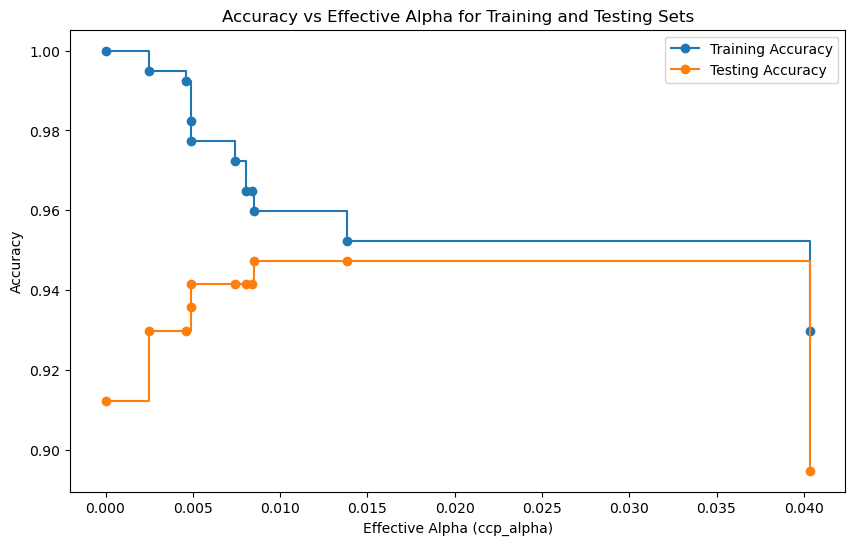

Optimal ccp_alpha: 0.008504058755315036
Best Test Accuracy: 0.9473684210526315
Final Model Test Accuracy: 0.9473684210526315


In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

ccp_alphas = ccp_alphas[:-1]

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ccp_alphas, train_scores, marker='o', label="Training Accuracy", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="Testing Accuracy", drawstyle="steps-post")
ax.set_xlabel("Effective Alpha (ccp_alpha)")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Effective Alpha for Training and Testing Sets")
ax.legend()
plt.show()

optimal_alpha_index = np.argmax(test_scores)
optimal_alpha = ccp_alphas[optimal_alpha_index]
best_test_accuracy = test_scores[optimal_alpha_index]

print(f"Optimal ccp_alpha: {optimal_alpha}")
print(f"Best Test Accuracy: {best_test_accuracy}")

best_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=optimal_alpha)
best_clf.fit(X_train, y_train)
final_test_accuracy = accuracy_score(y_test, best_clf.predict(X_test))
print(f"Final Model Test Accuracy: {final_test_accuracy}")


In [ ]:
Q 13) Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision, 
Recall, and F1-Score

In [13]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score

def train_and_evaluate_decision_tree():
    """
    Trains a Decision Tree Classifier using the Iris dataset and evaluates 
    its performance using precision, recall, and F1-score.
    """
    iris = load_iris()
    X, y = iris.data, iris.target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    print(f"Training samples: {len(X_train)}")
    print(f"Testing samples: {len(X_test)}\n")

    dt_classifier = DecisionTreeClassifier(random_state=42)
    dt_classifier.fit(X_train, y_train)
    
    print("Decision Tree Classifier trained successfully.\n")

    y_pred = dt_classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print("-" * 30)
    print("      Model Evaluation Metrics")
    print("-" * 30)
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print("-" * 30 + "\n")
    
    print("Detailed Classification Report:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

if __name__ == "__main__":
    train_and_evaluate_decision_tree()

Training samples: 120
Testing samples: 30

Decision Tree Classifier trained successfully.

------------------------------
      Model Evaluation Metrics
------------------------------
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000
------------------------------

Detailed Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
Q 14) Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn

Target classes: ['setosa' 'versicolor' 'virginica']

Training set size: 105 samples
Testing set size: 45 samples

Training the Decision Tree Classifier...
Training complete.

Confusion Matrix (as array):
 [[15  0  0]
 [ 0 12  3]
 [ 0  0 15]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.80      0.89        15
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



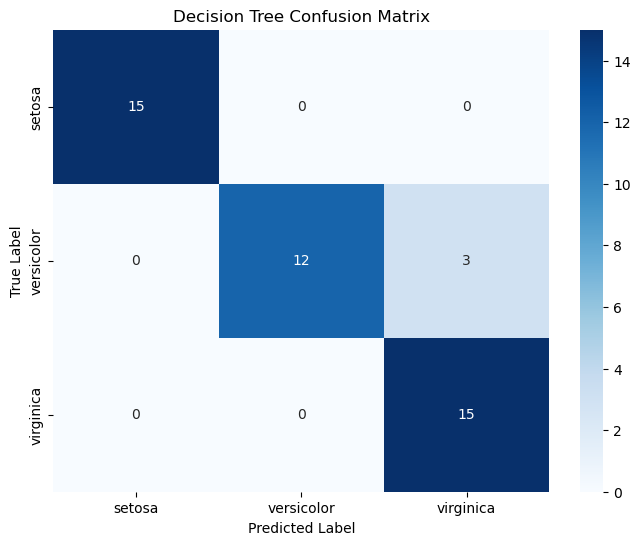

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_iris

def train_and_visualize_decision_tree():
    """
    Trains a Decision Tree Classifier, evaluates it, and visualizes 
    the confusion matrix using seaborn.
    """
    iris = load_iris()
    X = iris.data
    y = iris.target
    target_names = iris.target_names

    print(f"Target classes: {target_names}\n")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    print(f"Training set size: {len(X_train)} samples")
    print(f"Testing set size: {len(X_test)} samples\n")

    dt_classifier = DecisionTreeClassifier(random_state=42)
    print("Training the Decision Tree Classifier...")
    dt_classifier.fit(X_train, y_train)
    print("Training complete.\n")

    y_pred = dt_classifier.predict(X_test)

    conf_mat = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, target_names=target_names)

    print("Confusion Matrix (as array):\n", conf_mat)
    print("\nClassification Report:\n", class_report)

    plt.figure(figsize=(8, 6))
    sns.heatmap(
        conf_mat, 
        annot=True, 
        fmt='d', 
        cmap='Blues',
        xticklabels=target_names, 
        yticklabels=target_names
    )
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Decision Tree Confusion Matrix')
    plt.show()

if __name__ == "__main__":
    train_and_visualize_decision_tree()

In [ ]:
Q 15) Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values 
for max_depth and min_samples_split

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 15]
}

dt_classifier = DecisionTreeClassifier(random_state=42)


grid_search = GridSearchCV(
    estimator=dt_classifier,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,  
    n_jobs=-1   
)

print("Starting GridSearchCV...")
grid_search.fit(X_train, y_train)
print("GridSearchCV finished.")

print("\n--- GridSearchCV Results ---")
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"\nTest set accuracy with the best model: {test_accuracy:.4f}")

print("\n--- All Tested Parameters and Scores ---")
results = grid_search.cv_results_
for mean_score, params in zip(results["mean_test_score"], results["params"]):
    print(f"Mean CV score: {mean_score:.4f} for parameters: {params}")



Starting GridSearchCV...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
